# Requirements

In [1]:
import os
import warnings
# Suppress warnings for cleaner output.
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.patches as mpatches
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Data

In [2]:
!gdown 1Z6uSpWLt0NsFGGtBwY87yMZ5gR5NC5PS --folder

Processing file 1pYiswAUWu4LyQXhf9vKTXIk0kTEgXk_Z HICP - Bread and cereals.csv
Processing file 18ZLxCmE_t0crK5A7otXzBKXixucfxopT HICP - Fruit.csv
Processing file 1MEF_NvnOPKFZlSGzCBsBt2lzhAHvJfSV HICP - Meat.csv
Processing file 1RnDNNFRfg6wyJPg2UNCYzVgWp_8XmtKw HICP - Milk, cheese and eggs.csv
Processing file 1g-OKRik0nZfSMcTmHSduxTbXB1xyKz_u HICP - Oils and fats.csv
Processing file 1qegtpfoHw3h7lD1_mFieI0qlCE7O8zqi HICP - Vegetables.csv
Building directory structure completed


Retrieving folder list
Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1pYiswAUWu4LyQXhf9vKTXIk0kTEgXk_Z
To: D:\FINKI\Papers\Food prices and food fraud analysis\HICP\HICP - Bread and cereals.csv

  0%|          | 0.00/56.3k [00:00<?, ?B/s]
100%|##########| 56.3k/56.3k [00:00<00:00, 2.52MB/s]
Downloading...
From: https://drive.google.com/uc?id=18ZLxCmE_t0crK5A7otXzBKXixucfxopT
To: D:\FINKI\Papers\Food prices and food fraud analysis\HICP\HICP - Fruit.csv

  0%|          | 0.00/56.3k [00:00<?, ?B/s]
100%|##########| 56.3k/56.3k [00:00<00:00, 1.17MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MEF_NvnOPKFZlSGzCBsBt2lzhAHvJfSV
To: D:\FINKI\Papers\Food prices and food fraud analysis\HICP\HICP - Meat.csv

  0%|          | 0.00/56.3k [00:00<?, ?B/s]
100%|##########| 56.3k/56.3k [00:00<00:00, 1.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnDNNFRfg6wyJPg2UNCYzVgWp_8XmtKw
To: D:\FINKI\Papers\Food prices 

In [3]:
!gdown 1RSKR-OJb3Xy9ji7kb97MRucEarzIewLD --folder

Processing file 1KsX81-ElqhUVoNFrtN-Z4SVY8fHu1V1J AGRIDATA_AT_2020-01_2023-06.csv
Processing file 1yHE3rTMPkKCgQqZJiP7btEIyxnymxsNj AGRIDATA_BE_2020-01_2023-06.csv
Processing file 1dC9kYfFXQGIhrUbGWfMyEiXd3UZBuFwW AGRIDATA_BG_2020-01_2023-06.csv
Processing file 1HCw5eIvizgRHQx7OcVoX4UNomU4f1YF6 AGRIDATA_DE_2020-01_2023-06.csv
Processing file 1wpmhX0w-syVLmuJWhogjG--N3o5yU9oD AGRIDATA_DK_2020-01_2023-06.csv
Processing file 1re_f153fLr9pCd8nkfGSYADoIocgKPy9 AGRIDATA_EL_2020-01_2023-06.csv
Processing file 1POTJ_qSx0KHj8EpxKvAJsebNXGoQywdt AGRIDATA_ES_2020-01_2023-06.csv
Processing file 1fhq89G5rwrKJWE91llN7UYvzHnzq06QW AGRIDATA_FI_2020-01_2023-06.csv
Processing file 1bSor1XsQv1W4nPNq0LId6Zg6qXAcyno4 AGRIDATA_FR_2020-01_2023-06.csv
Processing file 1HyRmqIa77rrVFRHy5pzRgwwIMRV26Muw AGRIDATA_HR_2020-01_2023-06.csv
Processing file 1Z1yJ9d91Tc9JmxXOZ29zilsBQLj64Lcf AGRIDATA_IT_2020-01_2023-06.csv
Processing file 1H5UEOyQChygfZrpN0M34Kux7w16R4ZsC AGRIDATA_NL_2020-01_2023-06.csv
Processing file 

Retrieving folder list
Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1KsX81-ElqhUVoNFrtN-Z4SVY8fHu1V1J
To: D:\FINKI\Papers\Food prices and food fraud analysis\Actual Prices\AGRIDATA_AT_2020-01_2023-06.csv

  0%|          | 0.00/7.88k [00:00<?, ?B/s]
100%|##########| 7.88k/7.88k [00:00<00:00, 3.65MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yHE3rTMPkKCgQqZJiP7btEIyxnymxsNj
To: D:\FINKI\Papers\Food prices and food fraud analysis\Actual Prices\AGRIDATA_BE_2020-01_2023-06.csv

  0%|          | 0.00/8.64k [00:00<?, ?B/s]
100%|##########| 8.64k/8.64k [00:00<00:00, 9.63MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dC9kYfFXQGIhrUbGWfMyEiXd3UZBuFwW
To: D:\FINKI\Papers\Food prices and food fraud analysis\Actual Prices\AGRIDATA_BG_2020-01_2023-06.csv

  0%|          | 0.00/8.20k [00:00<?, ?B/s]
100%|##########| 8.20k/8.20k [00:00<?, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=1HCw5eIvizgRH

In [4]:
!gdown 1CgQNtS9q2CdJXVbBLqy5fSxacZmv-EwK --folder

Processing file 1nYPOQ5eGlp-8U74nyQFTEkCmpxrPDcUJ average-monthly-salaries.csv
Building directory structure completed


Retrieving folder list
Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1nYPOQ5eGlp-8U74nyQFTEkCmpxrPDcUJ
To: D:\FINKI\Papers\Food prices and food fraud analysis\Average Monthly Salary\average-monthly-salaries.csv

  0%|          | 0.00/2.13k [00:00<?, ?B/s]
100%|##########| 2.13k/2.13k [00:00<?, ?B/s]
Download completed


# Variables

In [5]:
# Define categories.
categories = ['Bread and cereals', 'Meat', 'Milk, cheese and eggs', 'Oils and fats', 'Fruit', 'Vegetables']

In [6]:
# Define country codes.
codes = ['BE', 'BG', 'DK', 'DE', 'EL', 'ES', 'FR', 'HR', 'IT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'FI']

# Correlation between Actual Prices and HICP

In [7]:
correlation_df = pd.DataFrame(columns=['Country', 'Category', 'Correlation between Actual Prices and HICP'])
index = 0
for code in codes:
    for category in categories:
        actual_prices_df = pd.read_csv(f'Actual Prices/AGRIDATA_{code}_2020-01_2023-06.csv')
        hicp_df = pd.read_csv(f'HICP/HICP - {category}.csv')

        series1 = hicp_df[hicp_df['geo'] == code]['OBS_VALUE'].reset_index(drop=True)
        series2 = actual_prices_df[actual_prices_df['Category'] == category]['Price'].reset_index(drop=True)

        correlation_df.loc[index] = [code, category, series1.corr(series2)]
        index += 1

In [8]:
correlation_df

,Country,Category,Correlation between Actual Prices and HICP
0,BE,Bread and cereals,0.156845
1,BE,Meat,0.911614
2,BE,"Milk, cheese and eggs",0.505996
3,BE,Oils and fats,0.487762
4,BE,Fruit,-0.106373
...,...,...,...
91,FI,Meat,0.978844
92,FI,"Milk, cheese and eggs",0.973230
93,FI,Oils and fats,NaN
94,FI,Fruit,NaN


# Inflation Rate

In [9]:
def inflation(data_frame, period=1):
    result = (data_frame / data_frame.shift(period) - 1)
    result.dropna(axis=0, inplace=True)

    return result

In [10]:
dates = pd.date_range(start='2020-01-01', end='2023-07-01', freq='M').format(date_format='%Y/%m')

In [11]:
# Calculate inflation rates for each category in each country.
for category in categories:
    hicp_df = pd.read_csv(f'HICP/HICP - {category}.csv')
    hicp_df = hicp_df[['geo', 'TIME_PERIOD', 'OBS_VALUE']]

    new_df = pd.DataFrame(dict([(code, hicp_df[hicp_df['geo'] == code].sort_values(by='TIME_PERIOD')['OBS_VALUE'].tolist()) for code in codes]))
    new_df['Year/Month'] = dates
    new_df.set_index('Year/Month', inplace=True)

    inflation_rate_df = inflation(new_df, 12)
    directory = f'Inflation Rate'
    os.makedirs(directory, exist_ok=True)
    inflation_rate_df.to_csv(f'{directory}/Inflation Rate - {category}.csv')

# Expected Prices

In [12]:
dates = pd.date_range(start='2021-01-01', end='2023-07-01', freq='M').format(date_format='%Y/%m')

In [13]:
# Calculate expected prices for each category in each country.
directory = 'Expected Prices'
for code in codes:
    country_directory = os.path.join(directory, code)
    os.makedirs(country_directory, exist_ok=True)

    prices_df = pd.read_csv(f'Actual Prices/AGRIDATA_{code}_2020-01_2023-06.csv')
    prices_df.set_index('Year/Month', inplace=True)
    for category in categories:
        category_directory = os.path.join(country_directory, category)
        os.makedirs(category_directory, exist_ok=True)

        inflation_rate_df = pd.read_csv(f'Inflation Rate/Inflation Rate - {category}.csv')
        inflation_rate_df.set_index('Year/Month', inplace=True)

        x = pd.DataFrame(prices_df[prices_df['Category'] == category]['Price']).iloc[12:, :]
        tmp = pd.DataFrame(prices_df[prices_df['Category'] == category]['Price']).iloc[:-12, :]
        y = pd.DataFrame(tmp['Price'].multiply(1 + inflation_rate_df[code].values))
        y.index = pd.Series(name='Year/Month', data=dates)

        x.to_csv(os.path.join(category_directory, 'Real Price.csv'))
        y.to_csv(os.path.join(category_directory, 'Expected Price.csv'))
        inflation_rate_df[code].to_csv(os.path.join(category_directory, 'Inflation Rate.csv'))

        fig, ax = plt.subplots()
        ax.plot(dates, x['Price'], color='red', label='Real Price')
        ax.plot(dates, y['Price'], color='blue', label='Expected Price')
        ax.legend(loc='upper left')
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.subplots_adjust(bottom=0.17)
        ax.set_xticks(dates)
        ax.set_xticklabels(dates)
        plt.savefig(os.path.join(category_directory, f'plot.png'))
        plt.close(fig)

# Food Fraud

In [14]:
# Calculate the food fraud for each category in each country.
for code in codes:
    for category in categories:
        df = pd.DataFrame(columns=['Year/Month', 'Fraud'])
        df['Year/Month'] = dates
        df['Fraud'] = [0.] * 30

        actual_prices_df = pd.read_csv(f'Expected Prices/{code}/{category}/Real Price.csv')
        expected_prices_df = pd.read_csv(f'Expected Prices/{code}/{category}/Expected Price.csv')

        for i in range(df['Fraud'].shape[0]):
            if pd.isna(expected_prices_df['Price'][i]) or pd.isna(actual_prices_df['Price'][i]):
                continue
            df.loc[i, 'Fraud'] =  (expected_prices_df.loc[i, 'Price'] - actual_prices_df.loc[i, 'Price']) / actual_prices_df.loc[i, 'Price']

        directory = f'Food Fraud/{code}/{category}'
        os.makedirs(directory, exist_ok=True)
        df.to_csv(f'{directory}/Fraud.csv', index=False)

# Framework for Food Prices Analysis

## Relation between Food Prices and Average Monthly Salary

In [15]:
# Calculate the ratio between food prices and average monthly salary for each country.
salaries_df = pd.read_csv('Average Monthly Salary/average-monthly-salaries.csv')
for code in codes:
    for category in categories:
        directory = f'Relation between Food Prices and Average Monthly Salary/{code}/{category}'
        os.makedirs(directory, exist_ok=True)
        real_prices_df = pd.read_csv(f'Expected Prices/{code}/{category}/Real Price.csv')
        real_prices_df['Salary'] = real_prices_df['Year/Month'].apply(lambda date: salaries_df[(salaries_df['Country Code'] == code) & (salaries_df['Year'] == int(date.split('/')[0]))]['Average Salary'].values[0]).values.tolist()
        real_prices_df['Ratio'] = real_prices_df['Salary'] / real_prices_df['Price']
        real_prices_df['Inverse Ratio'] = real_prices_df['Price'] / real_prices_df['Salary']
        real_prices_df.to_csv(f'{directory}/Real Price Ratio.csv', index=False)

        expected_prices_df = pd.read_csv(f'Expected Prices/{code}/{category}/Expected Price.csv')
        expected_prices_df['Salary'] = expected_prices_df['Year/Month'].apply(lambda date: salaries_df[(salaries_df['Country Code'] == code) & (salaries_df['Year'] == int(date.split('/')[0]))]['Average Salary'].values[0]).values.tolist()
        expected_prices_df['Ratio'] = expected_prices_df['Salary'] / expected_prices_df['Price']
        expected_prices_df['Inverse Ratio'] = expected_prices_df['Price'] / expected_prices_df['Salary']
        expected_prices_df.to_csv(f'{directory}/Expected Price Ratio.csv', index=False)

In [16]:
# Define the mapping between countries and regions.
dictionary = {
    'BE': 'West Europe and Scandinavia',
    'BG': 'East Europe and Mediterranean',
    'DK': 'West Europe and Scandinavia',
    'DE': 'West Europe and Scandinavia',
    'EL': 'East Europe and Mediterranean',
    'ES': 'East Europe and Mediterranean',
    'FR': 'West Europe and Scandinavia',
    'HR': 'East Europe and Mediterranean',
    'IT': 'East Europe and Mediterranean',
    'NL': 'West Europe and Scandinavia',
    'AT': 'West Europe and Scandinavia',
    'PL': 'East Europe and Mediterranean',
    'PT': 'East Europe and Mediterranean',
    'RO': 'East Europe and Mediterranean',
    'SI': 'East Europe and Mediterranean',
    'FI': 'West Europe and Scandinavia',
    'SE': 'West Europe and Scandinavia'
}

In [17]:
# Plot the relation between Food Prices and Average Monthly Salary.
for category in categories:
    fig, ax = plt.subplots()
    for code in codes:
        df = pd.read_csv(f'Relation between Food Prices and Average Monthly Salary/{code}/{category}/Real Price Ratio.csv')
        color = 'green' if dictionary[code] == 'West Europe and Scandinavia' else 'blue'
        ax.plot(df['Year/Month'], df['Ratio'], color=color)
    green_patch = mpatches.Patch(color='green', label='West Europe and Scandinavia')
    blue_patch = mpatches.Patch(color='blue', label='East Europe and Mediterranean')
    ax.legend(handles=[green_patch, blue_patch], loc='upper right')
    plt.xticks(rotation=90)
    plt.subplots_adjust(bottom=0.17)
    ax.set_xticks(dates)
    ax.set_xticklabels(dates)
    plt.title(category, pad=10)
    plt.tight_layout()
    os.makedirs('Relation between Food Prices and Average Monthly Salary/Plots', exist_ok=True)
    plt.savefig(os.path.join(f'Relation between Food Prices and Average Monthly Salary/Plots/{category}.png'))
    plt.close(fig)

## Food Prices Network Analysis

In [18]:
# Compute the Pearson correlation coefficients between food prices of each category in each country.
for code in codes:
    df = pd.DataFrame(columns=['Category 1', 'Category 2', 'Correlation'])
    index = 0
    for idx1, cat1 in enumerate(categories):
        for idx2, cat2 in enumerate(categories):
            if idx1 >= idx2:
                continue

            df1 = pd.read_csv(f'Expected Prices/{code}/{cat1}/Real Price.csv')
            df2 = pd.read_csv(f'Expected Prices/{code}/{cat2}/Real Price.csv')
            corr = df1['Price'].corr(df2['Price'], method='pearson')
            df.loc[index] = [cat1, cat2, corr]
            index += 1

    df.sort_values(by='Correlation', ascending=False, inplace=True)
    directory = f'Food Prices Network Analysis/Correlation/{code}'
    os.makedirs(directory, exist_ok=True)
    df.to_csv(f'{directory}/Correlation.csv', index=False)

In [19]:
# Visualize the networks.
for code in codes:
    nodes = pd.DataFrame({'name': categories, 'id': categories})
    edges = pd.read_csv(f'Food Prices Network Analysis/Correlation/{code}/Correlation.csv').dropna(axis=0)
    edges.rename(columns={'Category 1': 'from', 'Category 2': 'to', 'Correlation': 'Importance'}, inplace=True)
    edges['Importance'] = edges['Importance'].apply(abs)

    G = nx.from_pandas_edgelist(edges, 'from', 'to', ['Importance'])
    edge_weights = [edge[2]['Importance'] * 10 for edge in G.edges(data=True)]

    fig, ax = plt.subplots(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', width=edge_weights, edge_color='gray', arrows=False)

    directory = f'Food Prices Network Analysis/Networks/{code}'
    os.makedirs(directory, exist_ok=True)
    plt.tight_layout()
    plt.savefig(f'{directory}/Networks.png')
    plt.close(fig)

## Food Prices Cluster Map Analysis

In [20]:
# Compute the Pearson correlation coefficients between correlations of each country.
df = pd.DataFrame()
for code in codes:
    corr_df = pd.read_csv(f'Food Prices Network Analysis/Correlation/{code}/Correlation.csv')
    df[code] = corr_df['Correlation']

In [21]:
df.corr()

,BE,BG,DK,DE,EL,ES,FR,HR,IT,NL,AT,PL,PT,RO,SI,FI
BE,1.000000,0.976936,0.510690,0.971138,0.968389,0.974142,0.946761,0.961179,0.938906,0.951704,0.942729,0.982805,0.916013,0.961032,0.924237,0.995958
BG,0.976936,1.000000,0.587650,0.947584,0.973027,0.934384,0.963760,0.933454,0.921741,0.962037,0.948515,0.957514,0.872305,0.941916,0.955454,0.999998
DK,0.510690,0.587650,1.000000,0.653412,0.868959,0.659891,0.653456,0.677155,0.890437,0.868471,0.927299,0.790967,0.812507,0.992575,0.800274,0.585847
DE,0.971138,0.947584,0.653412,1.000000,0.930850,0.924331,0.840914,0.861131,0.890964,0.924929,0.804532,0.984716,0.877831,0.978000,0.976833,0.996291
EL,0.968389,0.973027,0.868959,0.930850,1.000000,0.947051,0.939817,0.922107,0.946774,0.976854,0.925883,0.944855,0.838672,0.928480,0.992155,0.910142
ES,0.974142,0.934384,0.659891,0.924331,0.947051,1.000000,0.946367,0.808609,0.969970,0.939410,0.917499,0.953121,0.914661,0.891953,0.978636,0.995515
FR,0.946761,0.963760,0.653456,0.840914,0.939817,0.946367,1.000000,0.915464,0.950506,0.903261,0.967289,0.877293,0.859800,0.872426,0.976846,0.996286
HR,0.961179,0.933454,0.677155,0.861131,0.922107,0.808609,0.915464,1.000000,0.792202,0.943309,0.918788,0.878040,0.959347,0.846740,0.983145,0.993050
IT,0.938906,0.921741,0.890437,0.890964,0.946774,0.969970,0.950506,0.792202,1.000000,0.860017,0.915378,0.903451,0.812523,0.859119,0.985491,0.890488
NL,0.951704,0.962037,0.868471,0.924929,0.976854,0.939410,0.903261,0.943309,0.860017,1.000000,0.869743,0.970757,0.978231,0.968630,0.992278,0.910549


<Figure size 2400x1800 with 0 Axes>

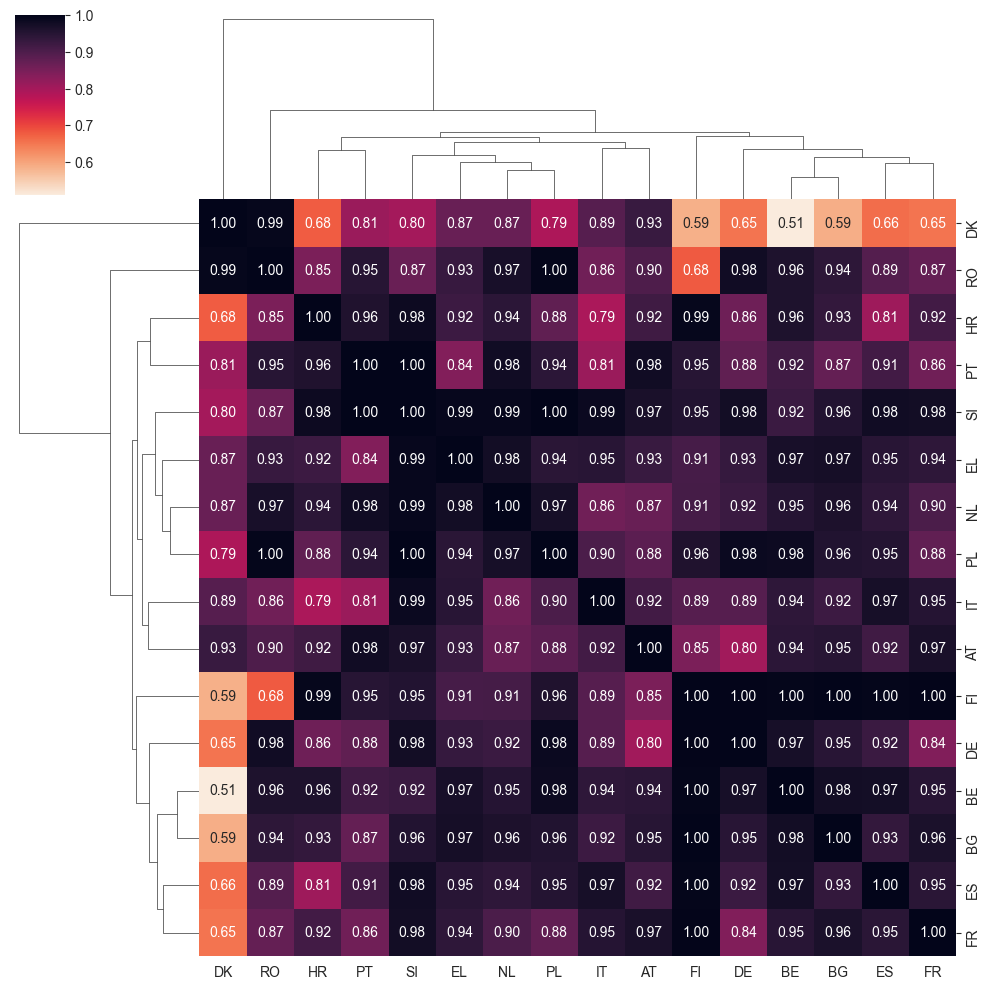

In [22]:
# Visualize the cluster map.
figure(figsize=(8, 6), dpi=300)
sns.clustermap(df.corr(), annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='.2f')
directory = f'Food Prices Network Analysis/Cluster Map'
os.makedirs(directory, exist_ok=True)
plt.savefig(f'{directory}/Cluster Map.png')

# Framework for Food Fraud Analysis

## Food Fraud Network Analysis

In [23]:
# Compute the Pearson correlation coefficients between food fraud of each category in each country.
for code in codes:
    df = pd.DataFrame(columns=['Category 1', 'Category 2', 'Correlation'])
    index = 0
    for idx1, cat1 in enumerate(categories):
        for idx2, cat2 in enumerate(categories):
            if idx1 >= idx2:
                continue

            df1 = pd.read_csv(f'Food Fraud/{code}/{cat1}/Fraud.csv')
            df2 = pd.read_csv(f'Food Fraud/{code}/{cat2}/Fraud.csv')
            corr = df1['Fraud'].corr(df2['Fraud'], method='pearson')
            df.loc[index] = [cat1, cat2, corr]
            index += 1
    df.sort_values(by='Correlation', ascending=False, inplace=True)
    directory = f'Food Fraud Network Analysis/Correlation/{code}'
    os.makedirs(directory, exist_ok=True)
    df.to_csv(f'{directory}/Correlation.csv', index=False)

In [24]:
# Visualize the networks.
for code in codes:
    nodes = pd.DataFrame({'name': categories, 'id': categories})
    edges = pd.read_csv(f'Food Fraud Network Analysis/Correlation/{code}/Correlation.csv').dropna(axis=0)
    edges.rename(columns={'Category 1': 'from', 'Category 2': 'to', 'Correlation': 'Importance'}, inplace=True)
    edges['Importance'] = edges['Importance'].apply(abs)

    G = nx.from_pandas_edgelist(edges, 'from', 'to', ['Importance'])
    edge_weights = [edge[2]['Importance'] * 10 for edge in G.edges(data=True)]

    fig, ax = plt.subplots(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', width=edge_weights, edge_color='gray', arrows=False)

    directory = f'Food Fraud Network Analysis/Networks/{code}'
    os.makedirs(directory, exist_ok=True)
    plt.tight_layout()
    plt.savefig(f'{directory}/Networks.png')
    plt.close(fig)

## Food Fraud Cluster Map Analysis

In [25]:
# Compute the Pearson correlation coefficients between correlations of each country.
df = pd.DataFrame()
for code in codes:
    corr_df = pd.read_csv(f'Food Fraud Network Analysis/Correlation/{code}/Correlation.csv')
    df[code] = corr_df['Correlation']

In [26]:
df.corr()

,BE,BG,DK,DE,EL,ES,FR,HR,IT,NL,AT,PL,PT,RO,SI,FI
BE,1.000000,0.919498,0.983536,0.975681,0.963808,0.972762,0.891366,0.883370,0.864774,0.961344,0.933393,0.971065,0.874986,0.930413,0.962991,0.993017
BG,0.919498,1.000000,0.896387,0.885509,0.923094,0.912228,0.864213,0.774735,0.874948,0.857938,0.994349,0.888781,0.786078,0.887551,0.933031,0.866468
DK,0.983536,0.896387,1.000000,0.980769,0.997238,0.999707,0.865500,0.998819,0.892728,0.998177,0.937819,0.989104,0.992524,0.973682,0.995844,0.997987
DE,0.975681,0.885509,0.980769,1.000000,0.989613,0.971538,0.910837,0.877742,0.894845,0.987712,0.904526,0.976050,0.899304,0.954489,0.994468,0.966416
EL,0.963808,0.923094,0.997238,0.989613,1.000000,0.973690,0.934708,0.886254,0.893285,0.977577,0.939349,0.954686,0.840154,0.956222,0.986330,0.999941
ES,0.972762,0.912228,0.999707,0.971538,0.973690,1.000000,0.868541,0.773468,0.927993,0.940531,0.956515,0.961234,0.900368,0.909924,0.997757,0.996160
FR,0.891366,0.864213,0.865500,0.910837,0.934708,0.868541,1.000000,0.837664,0.915195,0.929525,0.866028,0.807392,0.950219,0.936185,0.816285,0.895527
HR,0.883370,0.774735,0.998819,0.877742,0.886254,0.773468,0.837664,1.000000,0.764288,0.886657,0.785800,0.881612,0.783840,0.987747,0.990245,0.999889
IT,0.864774,0.874948,0.892728,0.894845,0.893285,0.927993,0.915195,0.764288,1.000000,0.854642,0.995299,0.840266,0.946887,0.883163,0.930055,0.862353
NL,0.961344,0.857938,0.998177,0.987712,0.977577,0.940531,0.929525,0.886657,0.854642,1.000000,0.813066,0.950454,0.896571,0.963234,0.988532,0.999995


<Figure size 2400x1800 with 0 Axes>

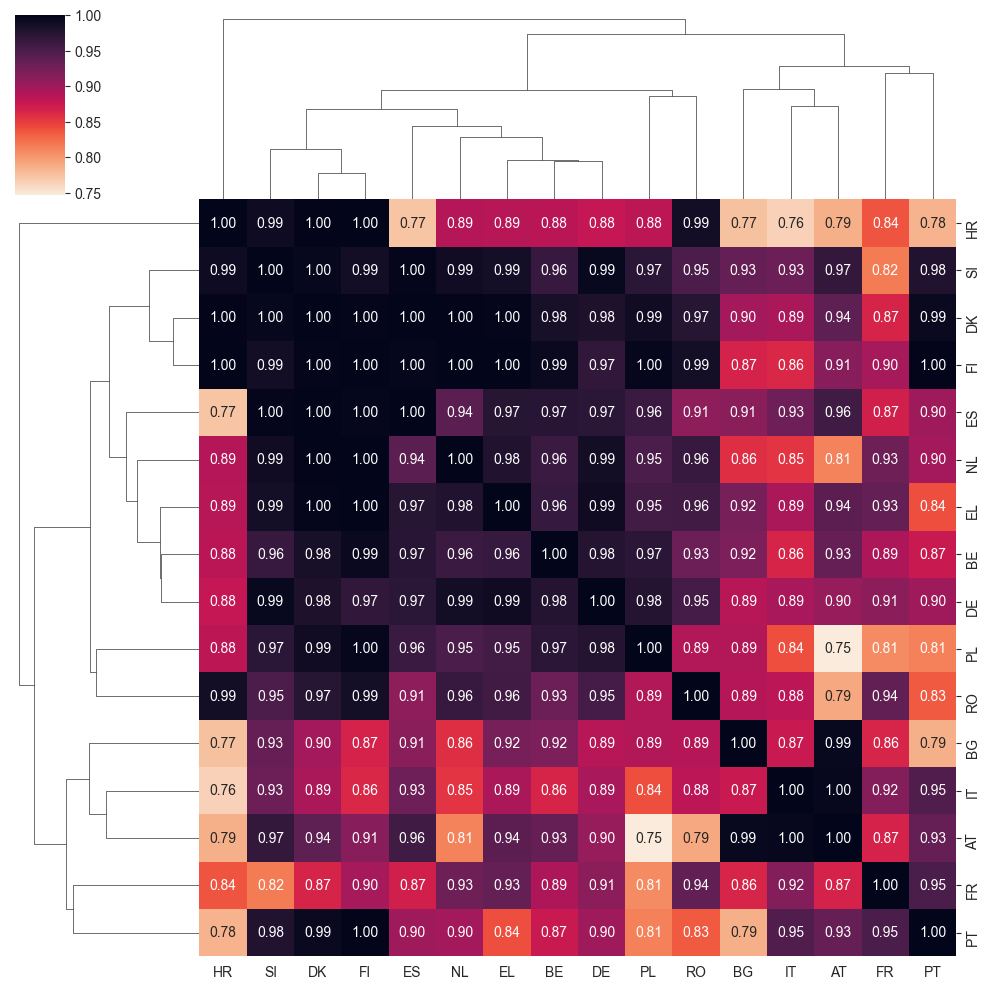

In [27]:
# Visualize the cluster map.
figure(figsize=(8, 6), dpi=300)
sns.clustermap(df.corr(), annot=True, cmap=sns.color_palette('rocket_r', as_cmap=True), fmt='.2f')
directory = f'Food Fraud Network Analysis/Cluster Map'
os.makedirs(directory, exist_ok=True)
plt.savefig(f'{directory}/Cluster Map.png')